Check construction data against other sources

In [1]:
import numpy as np
import pandas as pd
flows = pd.read_csv('../data/flows.csv')

Define the Sankey diagram structure and draw:

In [2]:
from palettable.cartocolors.qualitative import Prism_10, Antique_10
C = Prism_10.hex_colors[1:]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

First, all UK demand, including imports:

In [4]:
construction_demand = flows \
    .query('source == "products 14" and target == "uk_demand"') \
    .set_index('year')['value']
    #.groupby(['year', 'material'])['value'].sum() \
    #.unstack() \
    #[sectors]
    
construction_manufac_uk = flows \
    .query('source == "uk_production" and target == "sector 14"') \
    .set_index(['year', 'material'])['value'] \
    .unstack() \
    .fillna(0)

construction_manufac_imports = flows \
    .query('source == "imports" and target == "sector 14"') \
    .set_index(['year', 'material'])['value'] \
    .unstack() \
    .fillna(0)

construction_manufac_all = construction_manufac_uk.add(construction_manufac_imports, fill_value=0)

#construction_demand.plot();
#construction_manufac_imports

In [5]:
deliveries = pd.read_csv('../../issb-statistics/data/deliveries.csv') \
    .query('sector_code == "14"') \
    .set_index(['year', 'product'])['mass'] \
    .unstack() \
    .fillna(0)

deliveries

product,Bright bars,Cold rolled narrow strip,"Heavy sections, sheet piling, rails and rolled accessories",Hot rolled bars in lengths,"Ingots, blooms, billets and slabs",Light sections,Plates in coil and in lengths,Rods and bars for reinforcement,Rods in coil,"Sheets, coated and uncoated",Tubes and pipes
year,,,,,,,,,,,
1985,0.0,1.6,103.1,6.3,0.0,1.5,21.3,158.8,0.0,11.7,23.3
1990,0.0,1.3,376.7,16.6,0.1,8.6,98.9,280.1,1.6,166.2,56.4
1996,0.2,0.8,235.8,20.9,0.1,3.1,49.2,228.4,1.8,109.0,31.5
1998,0.2,0.8,246.9,18.9,0.1,2.5,48.0,220.6,1.8,107.7,27.1
2003,0.0,0.4,276.7,12.4,0.0,14.0,66.6,153.6,0.0,73.3,14.4
2007,0.0,0.3,323.8,8.7,0.0,5.0,103.5,196.3,17.9,40.3,8.0
2008,0.0,0.3,356.7,8.3,0.0,4.7,97.4,177.9,17.3,38.6,6.8


In [6]:
deliveries.sum(axis=1)

year
1985     327.6
1990    1006.5
1996     680.8
1998     674.6
2003     611.4
2007     703.8
2008     708.0
dtype: float64

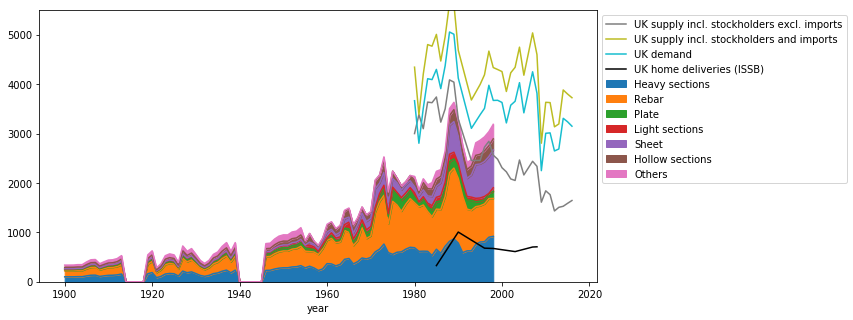

In [7]:
ley = pd.read_excel('./Ley_construction.xlsx', index_col='Year')
ley.plot.area(figsize=(10, 5));
construction_manufac_uk.sum(axis=1).plot(label='UK supply incl. stockholders excl. imports');
construction_manufac_all.sum(axis=1).plot(label='UK supply incl. stockholders and imports');
construction_demand.plot(label='UK demand');
deliveries.sum(axis=1).plot(color='k', label='UK home deliveries (ISSB)');
plt.legend(bbox_to_anchor=(1, 1));
plt.ylim(0, 5500);

Compare proportions of products

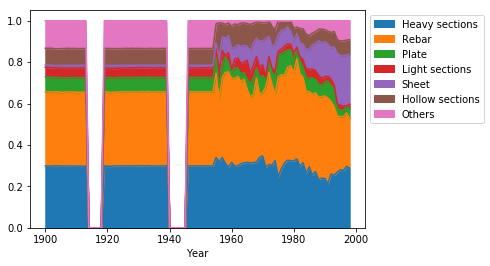

In [8]:
ley_proportions = (ley.T / ley.sum(axis=1)).T
ley_proportions.plot.area();
plt.legend(bbox_to_anchor=(1, 1));

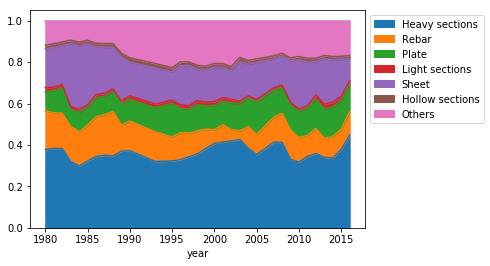

In [9]:
df = (construction_manufac_uk.T / construction_manufac_uk.sum(axis=1)).T

agg = {
    'Heavy sections': ['Heavy sections', 'Railway track material', 'Sheet piling and rolled accessories'],
    'Rebar': ['Reinforcing bar'],
    'Plate': ['Plate'],
    'Light sections': ['Light sections'],
    'Sheet': ['Cold rolled', 'Hot dipped galvanised', 'Hot rolled'],
    'Hollow sections': ['Tubes and pipes'],
    'Others': ['Hot rolled bars in lengths', 'Rods']
}

uk_manufac_home_proportions = pd.DataFrame({
    k: sum(df[j] for j in items)
    for k, items in agg.items()
})

uk_manufac_home_proportions.plot.area();
plt.legend(bbox_to_anchor=(1, 1));

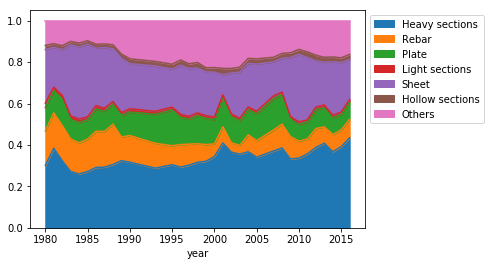

In [10]:
df = (construction_manufac_all.T / construction_manufac_all.sum(axis=1)).T
uk_manufac_all_proportions = pd.DataFrame({
    k: sum(df[j] for j in items)
    for k, items in agg.items()
})

uk_manufac_all_proportions.plot.area();
plt.legend(bbox_to_anchor=(1, 1));

Not much different when you include imports to UK manufacturing

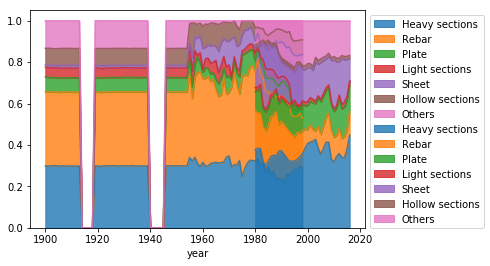

In [11]:
fig, ax = plt.subplots();
ley_proportions.plot.area(ax=ax, color=[f'C{i}' for i in range(7)], alpha=0.8);
uk_manufac_home_proportions.plot.area(ax=ax, color=[f'C{i}' for i in range(7)], alpha=0.8, label=None);
plt.legend(bbox_to_anchor=(1, 1));

So heavy sections are about right, not enough rebar, too much "sheet" and "other"?